Mounted at /content/drive
Found 5030 images belonging to 7 classes.
Found 1254 images belonging to 7 classes.


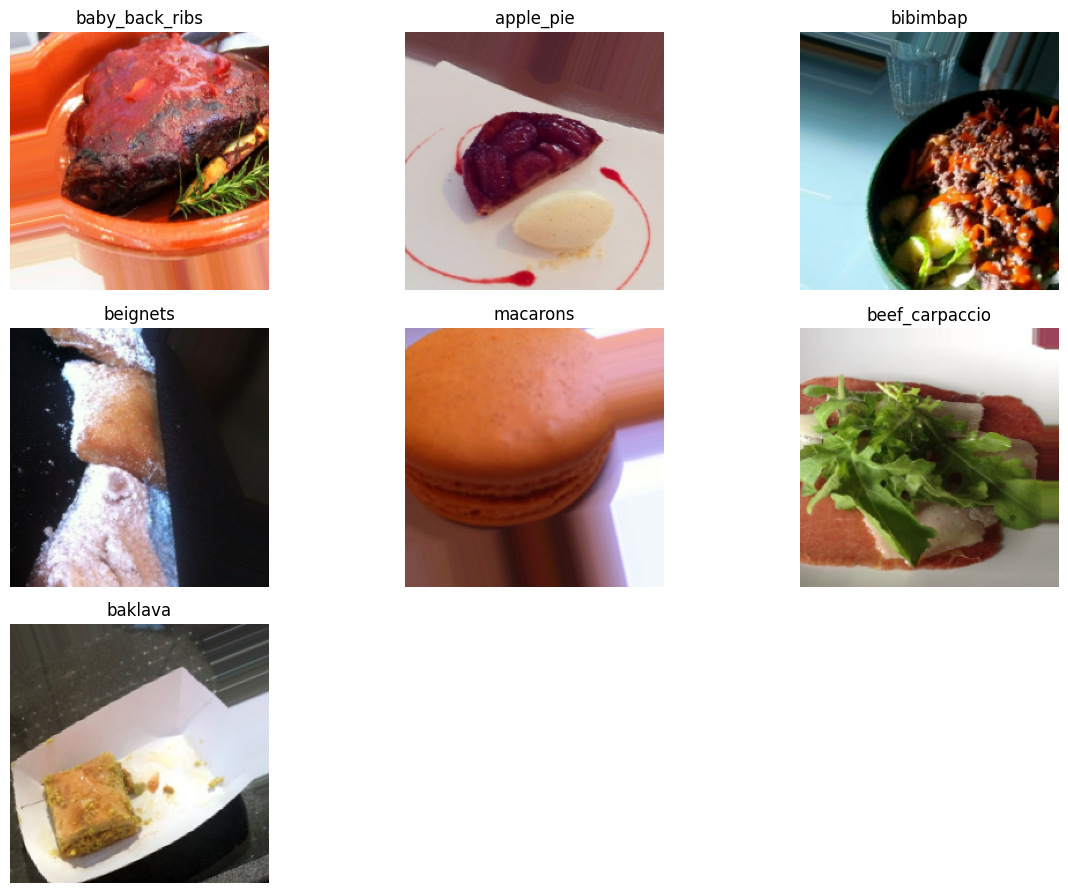

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/45
158/158 ━━━━━━━━━━━━━━━━━━━━ 1564s 10s/step - accuracy: 0.2661 - loss: 2.1073 - val_accuracy: 0.4490 - val_loss: 1.4527
Epoch 2/45
158/158 ━━━━━━━━━━━━━━━━━━━━ 875s 5s/step - accuracy: 0.4686 - loss: 1.4121 - val_accuracy: 0.4657 - val_loss: 1.3927
Epoch 3/45
158/158 ━━━━━━━━━━━━━━━━━━━━ 850s 5s/step - accuracy: 0.5105 - loss: 1.3053 - val_accuracy: 0.5702 - val_loss: 1.2053
Epoch 4/45
158/158 ━━━━━━━━━━━━━━━━━━━━ 871s 5s/step - accuracy: 0.5584 - loss: 1.1826 - val_accuracy: 0.5231 - val_loss: 1.2181
Epoch 5/45
158/158 ━━━━━━━━━━━━━━━━━━━━ 838s 5s/step - accuracy: 0.5867 - loss: 1.1080 - val_accuracy: 0.5813 - val_loss: 1.1092
Epoch 6/45
158/158 ━━━━━━━━━━━━━━━━━━━━ 867s 5s/step - accuracy: 0.6144 - loss: 1.0772 - val_accuracy: 0.6053 - val_loss: 1.0745
Epoch 7/45
158/158 ━━━━━━━━━━━━━━━━━━━━ 846s 5s/step - accuracy: 0.6160 - loss: 1.0254 - val_accuracy: 0.6220 - val_loss: 1.0596
Epoch 8/45
158/158 ━━━━━━━━━━━━━━━━━━━━ 833s 5s/step - accuracy: 0.6478 - loss: 0.9680 - val_ac

Training complete. Model saved!


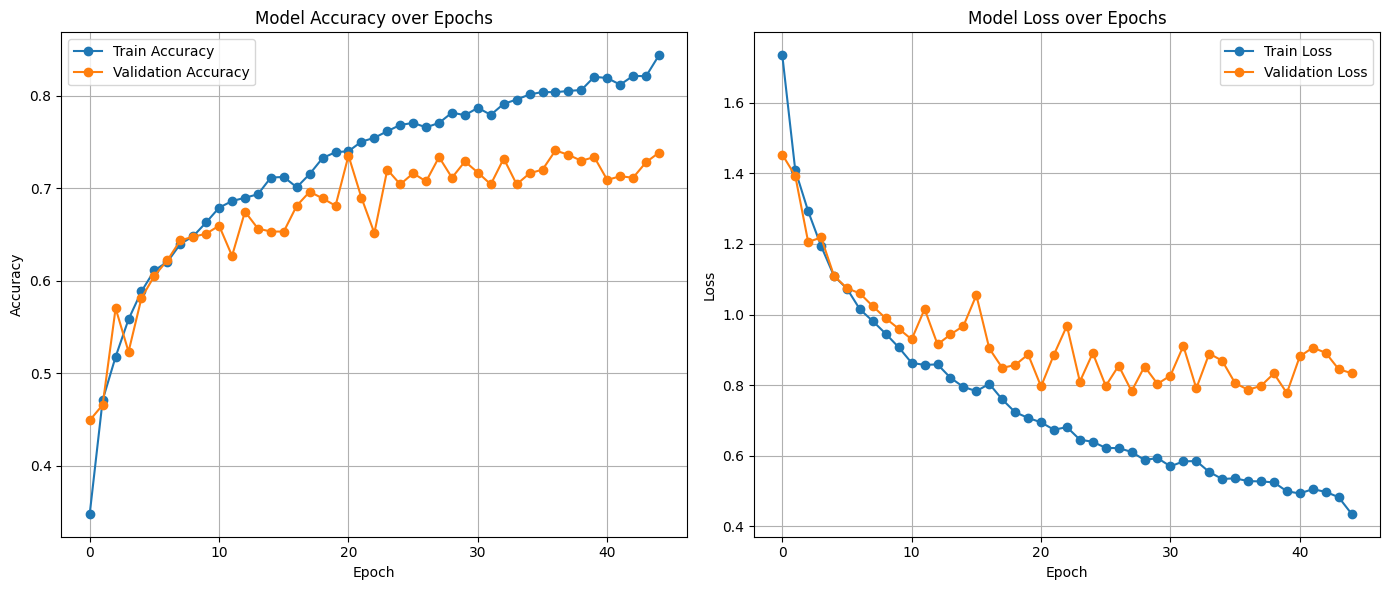

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define dataset path
DATASET_PATH = "/content/drive/MyDrive/tst_mkm_ythn/images"

# Define image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Define selected classes
selected_classes = [
    'apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio',
    'beignets', 'bibimbap', 'macarons'
]

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    classes=selected_classes
)

# Load validation data
val_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    classes=selected_classes
)

# Map class indices back to class names
index_to_class = {v: k for k, v in train_generator.class_indices.items()}

# Display one image per class
seen_classes = {}
for _ in range(20):  # Try 20 batches
    images, labels = next(train_generator)
    for img, label in zip(images, labels):
        class_index = np.argmax(label)
        class_name = index_to_class[class_index]
        if class_name not in seen_classes:
            seen_classes[class_name] = img
        if len(seen_classes) == len(selected_classes):
            break
    if len(seen_classes) == len(selected_classes):
        break

plt.figure(figsize=(12, 12))
for i, (class_name, img) in enumerate(seen_classes.items()):
    plt.subplot(4, 3, i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Save class labels
class_labels = train_generator.class_indices
with open('/content/drive/MyDrive/tst_mkm_ythn/images/Rainbow1_food_class_labels.json', 'w') as f:
    json.dump(class_labels, f)

# Build CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(class_labels), activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_generator, validation_data=val_generator, epochs=45)

# Save model
model.save('/content/drive/MyDrive/tst_mkm_ythn/images/Rainbow1_classification_model.h5')
print("Training complete. Model saved!")

# Plot training history
plt.figure(figsize=(14, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Found 1254 images belonging to 7 classes.
Number of validation images: 1254
Number of batches: 40
40/40 ━━━━━━━━━━━━━━━━━━━━ 418s 11s/step


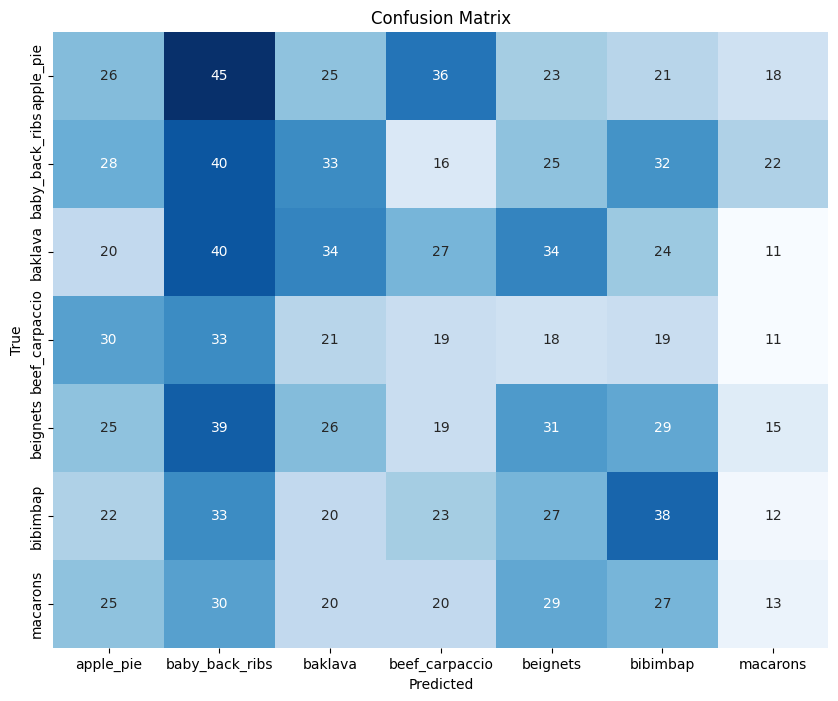

In [ ]:
import json
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/tst_mkm_ythn/images/Rainbow1_classification_model.h5')

# Recompile the model (to avoid the warning)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load the class labels
with open('/content/drive/MyDrive/tst_mkm_ythn/images/Rainbow1_food_class_labels.json', 'r') as f:
    class_labels = json.load(f)

# Reverse the class label mapping (i.e., numeric index to class name)
index_to_class = {v: k for k, v in class_labels.items()}

# Define the directory and subset for validation
dataset_path = '/content/drive/MyDrive/tst_mkm_ythn/images'  # update this path
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Create an ImageDataGenerator for validation
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of the data for validation
)

# Load validation data
val_generator = val_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',  # Ensure you are using the validation split
    classes=list(class_labels.keys())
)

# Check the number of images in the validation set
print(f"Number of validation images: {val_generator.samples}")
print(f"Number of batches: {len(val_generator)}")

# Make predictions on the validation set
y_true = val_generator.classes  # True labels
y_pred = model.predict(val_generator, steps=len(val_generator))  # Get predicted probabilities

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Create a dataframe for the confusion matrix
cm_df = pd.DataFrame(cm, index=index_to_class.values(), columns=index_to_class.values())

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


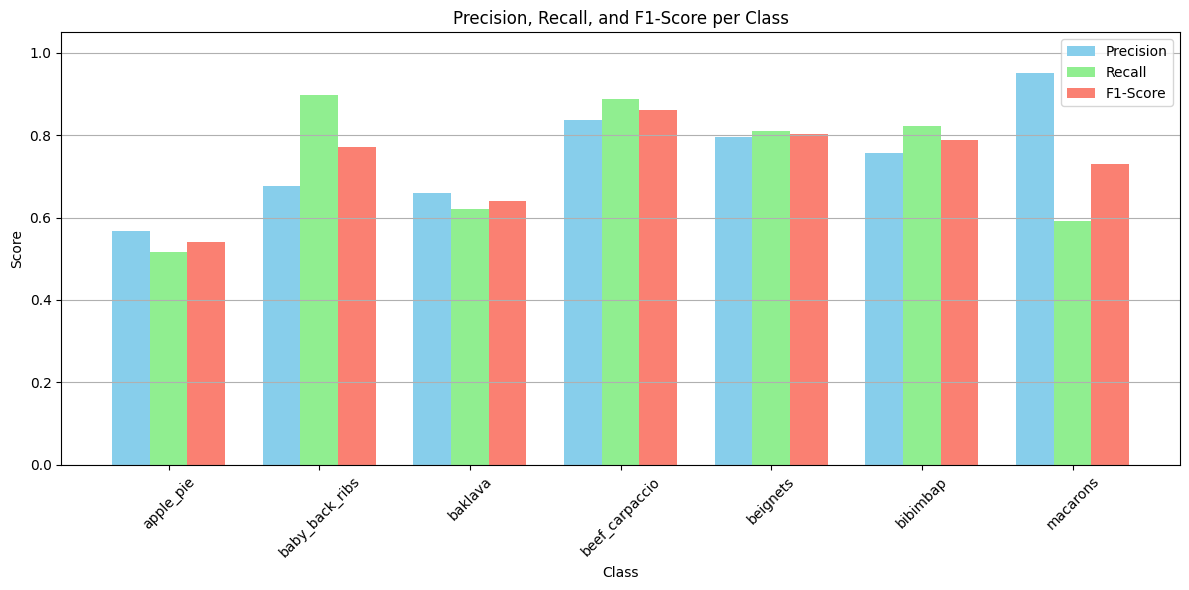

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Get the metrics per class
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, labels=np.arange(len(class_labels_list)))

x = np.arange(len(class_labels_list))  # the label locations
width = 0.25  # the width of the bars

plt.figure(figsize=(12, 6))
plt.bar(x - width, precision, width, label='Precision', color='skyblue')
plt.bar(x, recall, width, label='Recall', color='lightgreen')
plt.bar(x + width, f1_score, width, label='F1-Score', color='salmon')

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score per Class')
plt.xticks(x, class_labels_list, rotation=45)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


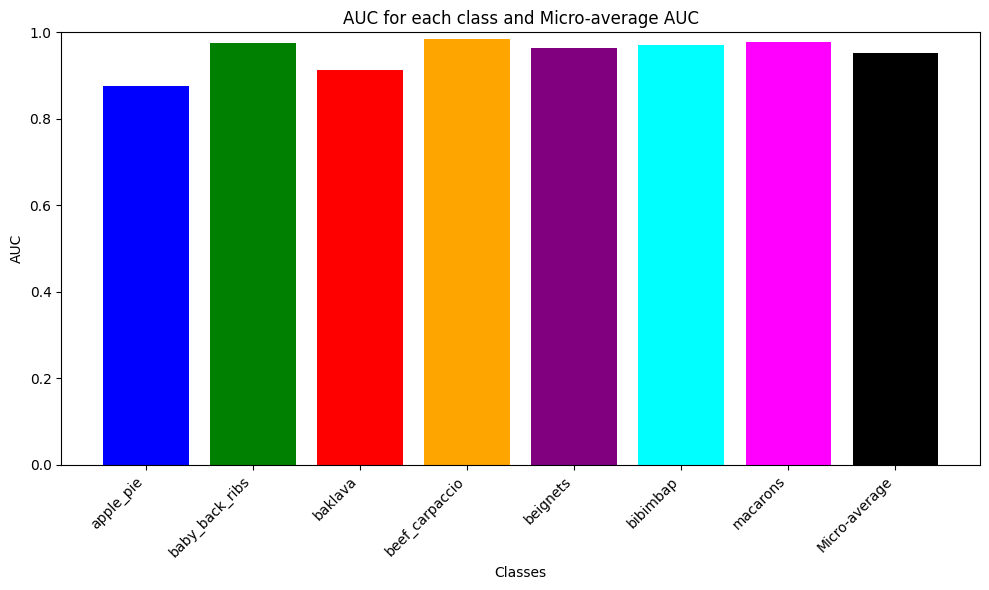

In [ ]:
import matplotlib.pyplot as plt

# Prepare AUC values for plotting
auc_values = list(roc_auc.values())
class_labels = list(class_labels_list) + ['Micro-average']

# Plot AUC for each class and micro-average
plt.figure(figsize=(10, 6))
plt.bar(class_labels, auc_values, color=['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'black'])
plt.xlabel('Classes')
plt.ylabel('AUC')
plt.title('AUC for each class and Micro-average AUC')
plt.ylim([0, 1])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import json
import pickle
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

nltk.download('punkt')

# Load intents JSON
with open('/content/drive/MyDrive/final.json') as f:
    data = json.load(f)

# Prepare X and y where y is the actual response
X, y = [], []



for intent in data['intents']:
    response = intent['responses'][0]  # Always use the first response
    for pattern in intent['patterns']:
        X.append(pattern.lower())
        y.append(response)



# Vectorize input patterns
vectorizer = TfidfVectorizer()
X_vector = vectorizer.fit_transform(X)

# Train model to predict actual responses
model = MultinomialNB()
model.fit(X_vector, y)

# Save model & vectorizer
with open('/content/drive/MyDrive/Finalresponse_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('/content/drive/MyDrive/Finalresponse_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("✅ Model trained with fixed pattern-response pairs!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✅ Model trained with fixed pattern-response pairs!


In [1]:
import os

# Create necessary directories
os.makedirs("templates", exist_ok=True)
os.makedirs("static/uploads", exist_ok=True)

# Create index.html with chatbot
html_code = """<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Food Classification and Chatbot</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f8f9fa;
            margin: 0;
            padding: 20px;
            text-align: center;
        }
        h1, h2, h3 {
            color: #343a40;
        }
        form {
            margin: 20px auto;
            padding: 20px;
            background-color: #ffffff;
            border-radius: 10px;
            box-shadow: 0 4px 8px rgba(0,0,0,0.1);
            max-width: 500px;
        }
        input[type="file"],
        input[type="text"] {
            width: 90%;
            padding: 10px;
            margin-bottom: 10px;
            border-radius: 5px;
            border: 1px solid #ccc;
        }
        button {
            background-color: #007bff;
            color: white;
            border: none;
            padding: 10px 20px;
            border-radius: 5px;
            cursor: pointer;
            font-size: 16px;
        }
        button:hover {
            background-color: #0056b3;
        }
        img {
            margin-top: 15px;
            border-radius: 8px;
            box-shadow: 0 4px 8px rgba(0,0,0,0.1);
        }
        p {
            color: #dc3545;
        }
        hr {
            margin: 40px 0;
        }
    </style>
</head>
<body>
    <h1>Upload an Image for Food Classification</h1>
    <form method="POST" enctype="multipart/form-data">
        <input type="file" name="file" accept="image/*" required>
        <button type="submit">Upload and Predict</button>
    </form>
    {% if prediction %}
        <h2>Prediction: {{ prediction }}</h2>
        <img src="{{ image_url }}" alt="Uploaded Image" width="300">
    {% endif %}
    {% if error %}
        <p>{{ error }}</p>
    {% endif %}



    <h2>Disease Info Chatbot</h2>
    <form method="POST">
        <input type="text" name="user_input" placeholder="Ask something..." required>
        <button type="submit">Ask</button>
    </form>
    {% if bot_response %}
        <h3>Bot: {{ bot_response }}</h3>
    {% endif %}
</body>
</html>
"""

with open("templates/index.html", "w") as f:
    f.write(html_code)

print("✅ index.html created successfully.")

# Create app.py with classification + chatbot
flask_code = """import os
import json
import pickle
from flask import Flask, request, render_template, url_for
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from werkzeug.utils import secure_filename
from pyngrok import ngrok

app = Flask(__name__)

# Paths
UPLOAD_FOLDER = "static/uploads"
MODEL_PATH = "/content/drive/MyDrive/tst_mkm_ythn/images/Rainbow1_classification_model.h5"
LABELS_PATH = "/content/drive/MyDrive/tst_mkm_ythn/images/Rainbow1_food_class_labels.json"
CHATBOT_MODEL_PATH = "/content/drive/MyDrive/Finalresponse_model.pkl"
VECTORIZER_PATH = "/content/drive/MyDrive/Finalresponse_vectorizer.pkl"

os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

# Load classification model
model = tf.keras.models.load_model(MODEL_PATH)

# Load labels
with open(LABELS_PATH, 'r') as f:
    class_labels = json.load(f)
class_labels = {v: k for k, v in class_labels.items()}

# Load chatbot model
with open(CHATBOT_MODEL_PATH, 'rb') as f:
    chatbot_model = pickle.load(f)

with open(VECTORIZER_PATH, 'rb') as f:
    chatbot_vectorizer = pickle.load(f)

def preprocess_image(img_path, img_size=(224, 224)):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image(img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]
    confidence = np.max(prediction) * 100
    return predicted_class, confidence

def get_response(user_input):
    input_vector = chatbot_vectorizer.transform([user_input.lower()])
    prediction = chatbot_model.predict(input_vector)
    return prediction[0]

public_url = ngrok.connect(5000)
print(f" * Public URL: {public_url}")

@app.route('/', methods=['GET', 'POST'])
def index():
    prediction = None
    image_url = None
    bot_response = None
    error = None

    if request.method == 'POST':
        if 'file' in request.files and request.files['file'].filename != '':
            file = request.files['file']
            filename = secure_filename(file.filename)
            file_path = os.path.join(app.config['UPLOAD_FOLDER'], filename)
            file.save(file_path)

            predicted_class, confidence = predict_image(file_path)
            prediction = f"{predicted_class} ({confidence:.2f}%)"
            image_url = url_for('static', filename=f'uploads/{filename}')

        elif 'user_input' in request.form:
            user_input = request.form['user_input']
            bot_response = get_response(user_input)

    return render_template('index.html', prediction=prediction, image_url=image_url,
                           bot_response=bot_response, error=error)

if __name__ == '__main__':
    app.run(debug=True, use_reloader=False, host='0.0.0.0', port=5000)
"""

with open("app.py", "w") as f:
    f.write(flask_code)

print("✅ app.py created successfully.")


✅ index.html created successfully.
✅ app.py created successfully.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install flask flask-ngrok tensorflow werkzeug

!pip install pyngrok
!ngrok authtoken 2xGgs5CCZ6uN5FJr170HCDkZUZp_5yXtaa9wqbwd5SzVnvFrF

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!python app.py

2025-06-15 05:23:26.901870: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749965006.924064    1066 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749965006.930384    1066 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-15 05:23:26.954169: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-15 05:23:35.436384: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL